## Loading data from MSCOCO dataset

Assumes 2017 train, val, and annontations are pre-downloaded.  If not, see `gsutil` section [here](http://cocodataset.org/#download).

Reference: [`pycoco` demo](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb)

In [1]:
import cv2
from pathlib import Path
from pycocotools.coco import COCO

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
import nltk
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

### COCO utils

In [2]:
def get_annot_index(annot_path, dataset='train', year=2017):
    annot_file = annot_path/f'captions_{dataset}{year}.json'
    return COCO(annot_file)

In [3]:
def get_instance_index(annot_path, dataset='train', year=2017):
    annot_file = annot_path/f'instances_{dataset}{year}.json'
    return COCO(annot_file)

In [4]:
def get_caption_index(annot_path, dataset='train', year=2017):
    annot_file = annot_path/f'captions_{dataset}{year}.json'
    return COCO(annot_file)

### Image utils

In [5]:
def read_image(datapath, filename, dataset='train', year=2017):
    im = cv2.imread(f'{str(datapath)}/{dataset}{year}/{filename}')
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

### Get annotations (captions) and corresponding images

Each annotation comes with an image ID, which can be used to access the image file.  Keep in mind that **image ID $\ne$ image file name!**

In the end, each image has five captions, but these captions may not necessarily be ordered that way in the dataset.

In [7]:
PATH = Path('data/')

In [8]:
coco = get_caption_index(PATH/'annotations')

loading annotations into memory...
Done (t=1.03s)
creating index...
index created!


In [10]:
all_annot_ids = list(coco.anns.keys())

In [12]:
annot_id = all_annot_ids[123]  # random annot ID
ann_id = all_annot_ids[annot_id]
caption = coco.anns[ann_id]['caption']
img_id = coco.anns[ann_id]['image_id']

In [13]:
caption

'Two hot dogs sit on a white paper plate near a soda cup which are sitting on a green picnic table while a bike and a silver car are parked nearby.'

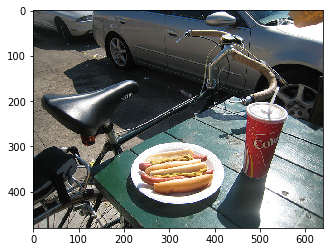

In [14]:
filename = coco.loadImgs(img_id)[0]['file_name']
img = read_image(PATH, filename)
plt.imshow(img); plt.show()

### Image categories

Use the _instance_ API to get categories.

In [16]:
coco = get_instance_index(PATH/'annotations')

loading annotations into memory...
Done (t=15.93s)
creating index...
index created!


In [17]:
coco.dataset['categories'][:5]  # some categories that exist

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]

In [18]:
# get all image IDs containing given categories
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds);

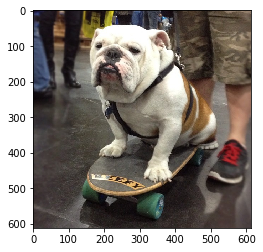

In [24]:
filename = coco.loadImgs(imgIds[3])[0]['file_name']  # random ID from imgIds
img = read_image(PATH, filename)
plt.imshow(img); plt.show()